<a href="https://colab.research.google.com/github/MatheusrCunha/PDS_1/blob/main/Filtros_notch_2023_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Filtros Notch

In [ ]:
Fs = 2000.0  # Frequência de amostragem (Hz)
f0 = 300.0  # Frequência central do notch (Hz)
Q = 2.0  # Fator de qualidade
B, A = signal.iirnotch(f0, Q, Fs) # https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirnotch.html

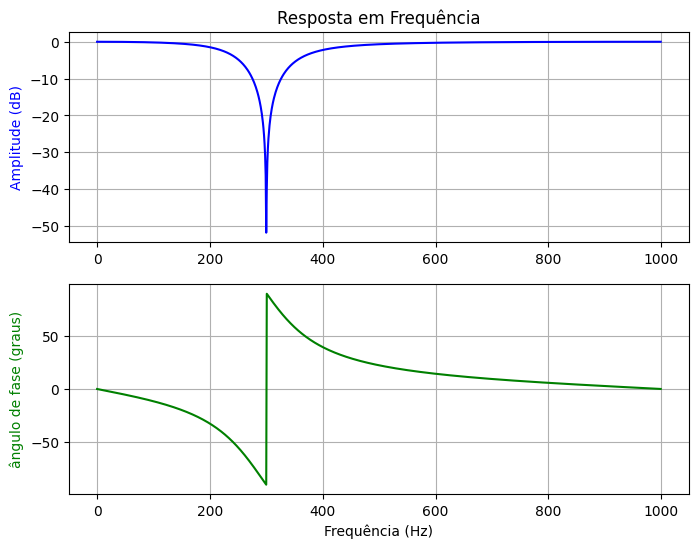

In [ ]:
# Resposta em frequência

freq, h = signal.freqz(B, A, 1024, fs=Fs)

fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(freq, 20*np.log10(abs(h)), color='blue')
ax[0].set_title("Resposta em Frequência")
ax[0].set_ylabel("Amplitude (dB)", color='blue')
ax[0].grid(True)
ax[1].plot(freq, np.unwrap(np.angle(h))*180/np.pi, color='green')
ax[1].set_ylabel("ângulo de fase (graus)", color='green')
ax[1].set_xlabel("Frequência (Hz)")
ax[1].grid(True)
plt.show()

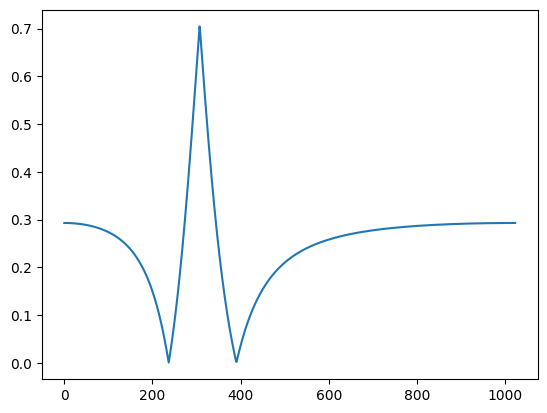

In [ ]:
# Procurando as frequências de corte:
abs_h_deslocado = abs(h) - max(abs(h)) + 1 # trazendo o topo de abs(h) para 0dB
vetor_distancias = abs(abs_h_deslocado-(1/np.sqrt(2))) # medindo as distâncias à amplitude nas frequências de corte
plt.plot(vetor_distancias)

In [ ]:
minimos_ordenados = np.argsort(vetor_distancias) # retorna os índices referentes à ordem crescente de distâncias
# as duas menores distâncias correspondem às frequências de corte do filtro notch

[231.4453125 380.859375 ]


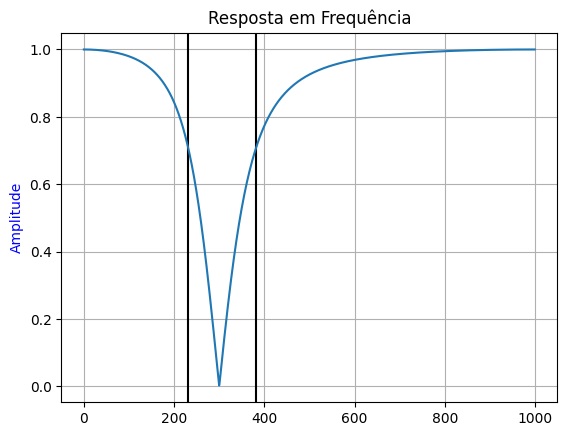

In [ ]:
index_freqs_corte = [minimos_ordenados[0], minimos_ordenados[1]]
freqs_corte = freq[index_freqs_corte]

plt.axvline(x = freqs_corte[0], color = 'k')
plt.axvline(x = freqs_corte[1], color = 'k')

plt.plot(freq, abs(h))
plt.title("Resposta em Frequência")
plt.ylabel("Amplitude", color='blue')
plt.grid(True)
print(freqs_corte)


Filtro notch de Nehorai/Ng

NEHORAI, A. “A Minimal Parameter Adaptive Notch Filter with Constrained
Poles and Zeros”, IEEE Transactions on Acoustics, Speech and Signal
Processing, v. 33, n. 4, pp. 983–996, August 1985.

NG, T. S. “Some Aspects of an Adaptive Digital Notch Filter with Constrained
Poles and Zeros”, IEEE Transactions on Acoustics, Speech, and Signal
Processing, v. 35, n. 2, pp. 158–161, February 1987.

In [ ]:
omega_0 = 2*np.pi*f0/Fs
rho_0 = 0.7 # raio do pólo
am_0 = -2*np.cos(omega_0)
B0 = np.array([1, am_0, 1])
A0 = np.array([1, rho_0*am_0, rho_0**2])

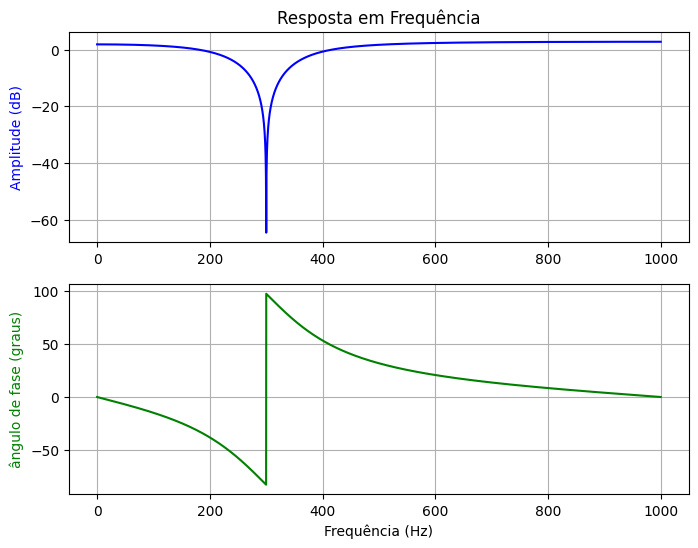

In [ ]:
# Resposta em frequência

freq, h0 = signal.freqz(B0, A0, 4096, fs=Fs)

fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(freq, 20*np.log10(abs(h0)), color='blue')
ax[0].set_title("Resposta em Frequência")
ax[0].set_ylabel("Amplitude (dB)", color='blue')
ax[0].grid(True)
ax[1].plot(freq, np.unwrap(np.angle(h0))*180/np.pi, color='green')
ax[1].set_ylabel("ângulo de fase (graus)", color='green')
ax[1].set_xlabel("Frequência (Hz)")
ax[1].grid(True)
plt.show()

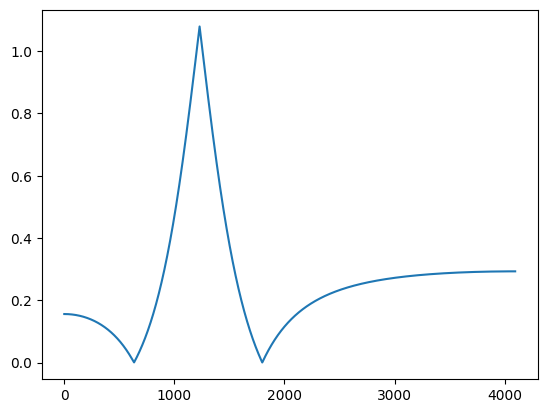

In [ ]:
# Procurando as frequências de corte:
abs_h0_deslocado = abs(h0) - max(abs(h0)) + 1 # trazendo o topo de abs(h) para 0dB
vetor_distancias = abs(abs_h0_deslocado-(1/np.sqrt(2))) # medindo as distâncias à amplitude nas frequências de corte
minimos_ordenados = np.argsort(vetor_distancias) # retorna os índices referentes à ordem crescente de distâncias

plt.plot(vetor_distancias)

[438.96484375 154.54101562]


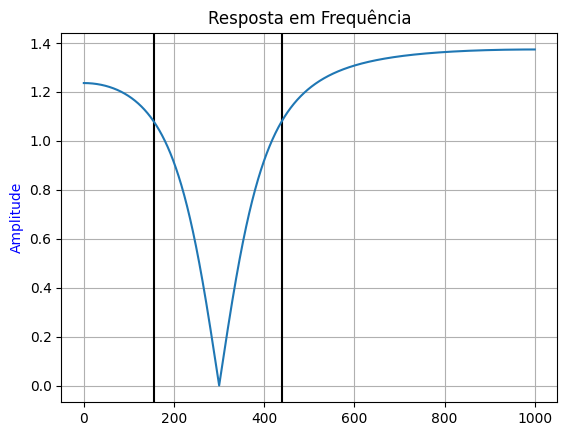

In [ ]:
# as duas menores distâncias correspondem às frequências de corte do filtro notch
index_freqs_corte = [minimos_ordenados[0], minimos_ordenados[1]]
freqs_corte = freq[index_freqs_corte]

# only one line may be specified; full height
plt.axvline(x = freqs_corte[0], color = 'k')
plt.axvline(x = freqs_corte[1], color = 'k')

#fig, ax = plt.subplots(2, 1, figsize=(8, 6))
plt.plot(freq, abs(h0))
plt.title("Resposta em Frequência")
plt.ylabel("Amplitude", color='blue')
plt.grid(True)
print(freqs_corte)

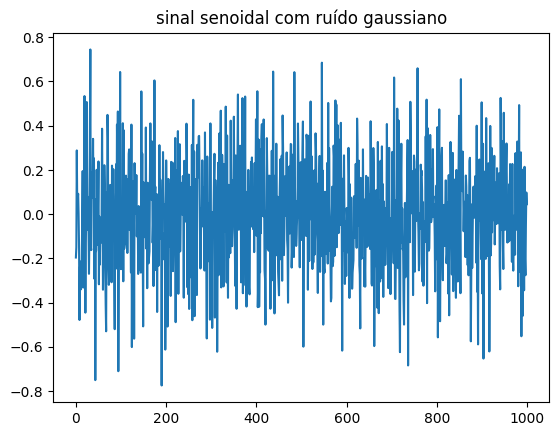

In [ ]:
# Ruído branco gaussiano
d = 0.5 # duração em segundos
N = np.round(d * Fs).astype(int) # número de amostras
n = np.arange(0,N) # índice amostral
sinal = np.random.normal(0, 0.25, N)
plt.plot(n, sinal)
plt.title('sinal senoidal com ruído gaussiano')
plt.axis('tight')
plt.show()

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.sosfilt.html
# Array of second-order filter coefficients, must have shape (n_sections, 6). Each row corresponds to a second-order section, with the first three columns providing the numerator coefficients and the last three providing the denominator coefficients.
SOS0 = np.concatenate((B0,A0),axis=0)
y0 = signal.sosfilt(SOS0, sinal)

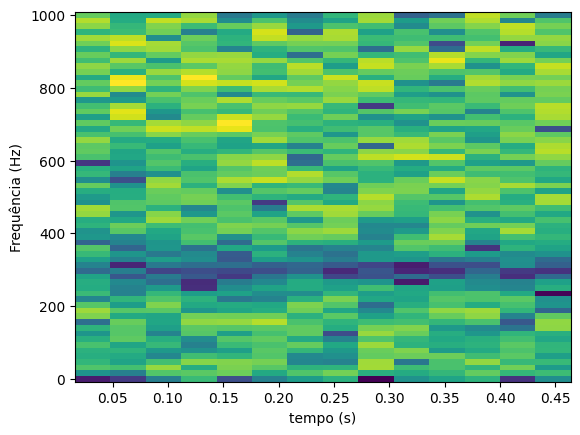

In [ ]:
freq,tempo,potencia = signal.spectrogram(y0,Fs,'hamming',128,64)
max_pot = np.max(potencia)
pot_norm = potencia/max_pot
potencia_dB = 10*np.log10(potencia)
plt.pcolormesh(tempo,freq,potencia_dB)
plt.xlabel('tempo (s)'), plt.ylabel('Frequência (Hz)')
plt.show()

Acrescentando mais uma sessão:


In [ ]:
f1 = 750
omega_1 = 2*np.pi*f1/Fs
rho_1 = 0.8 # raio do pólo
am_1 = -2*np.cos(omega_1)
B1 = np.array([1, am_1, 1])
A1 = np.array([1, rho_1*am_1, rho_1**2])

<ipython-input-19-286c1a85a83f>:6: RuntimeWarning: divide by zero encountered in log10
  ax[0].plot(freq, 20*np.log10(abs(h1)), color='blue')


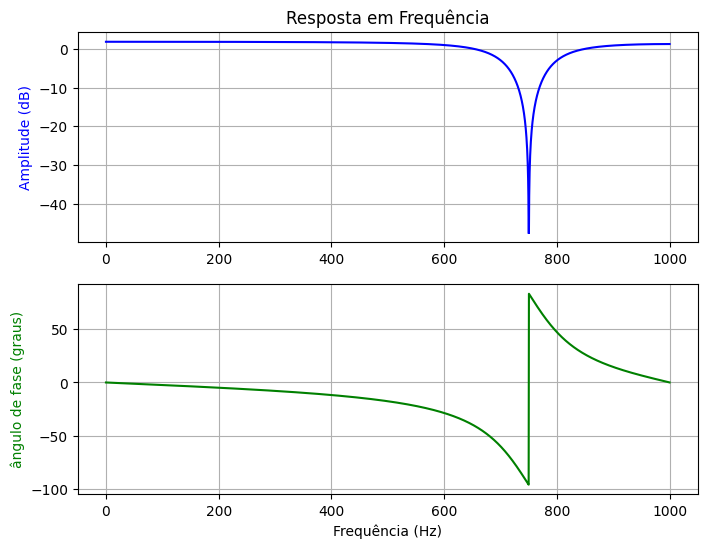

In [ ]:
# Resposta em frequência

freq, h1 = signal.freqz(B1, A1, 4096, fs=Fs)

fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(freq, 20*np.log10(abs(h1)), color='blue')
ax[0].set_title("Resposta em Frequência")
ax[0].set_ylabel("Amplitude (dB)", color='blue')
ax[0].grid(True)
ax[1].plot(freq, np.unwrap(np.angle(h1))*180/np.pi, color='green')
ax[1].set_ylabel("ângulo de fase (graus)", color='green')
ax[1].set_xlabel("Frequência (Hz)")
ax[1].grid(True)
plt.show()

In [ ]:
# Resposta em frequência total:
H = h0*h1

<ipython-input-21-2900a288f014>:2: RuntimeWarning: divide by zero encountered in log10
  ax[0].plot(freq, 20*np.log10(abs(H)), color='blue')


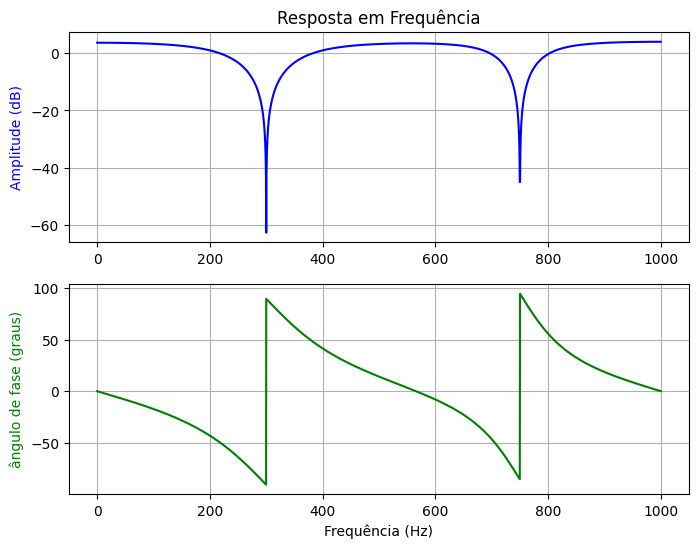

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(freq, 20*np.log10(abs(H)), color='blue')
ax[0].set_title("Resposta em Frequência")
ax[0].set_ylabel("Amplitude (dB)", color='blue')
ax[0].grid(True)
ax[1].plot(freq, np.unwrap(np.angle(H))*180/np.pi, color='green')
ax[1].set_ylabel("ângulo de fase (graus)", color='green')
ax[1].set_xlabel("Frequência (Hz)")
ax[1].grid(True)
plt.show()

In [ ]:
# Array of second-order filter coefficients, must have shape (n_sections, 6). Each row corresponds to a second-order section, with the first three columns providing the numerator coefficients and the last three providing the denominator coefficients.
SOS1 = np.concatenate((B1,A1),axis=0)
SOS =  np.zeros([2,6])
SOS[0,:] = SOS0
SOS[1,:] = SOS1

In [ ]:
y = signal.sosfilt(SOS, sinal)

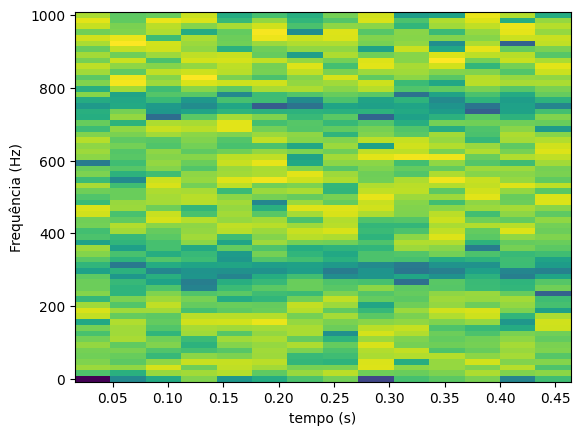

In [ ]:
freq,tempo,potencia = signal.spectrogram(y,Fs,'hamming',128,64)
max_pot = np.max(potencia)
pot_norm = potencia/max_pot
potencia_dB = 10*np.log10(potencia)
plt.pcolormesh(tempo,freq,potencia_dB)
plt.xlabel('tempo (s)'), plt.ylabel('Frequência (Hz)')
plt.show()